# 1. initial Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
#import numpy for number array handling and represent rgb image pixel values
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

# from focal_loss import SparseCategoricalFocalLoss

#import libraries for visualization of data
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

In [2]:
from garbage.garbage_classifier import GarbageClassifier
from garbage.mlflow_tracker import MLFlowTracker
from metrics import plot_loss, plot_accuracy, print_confusion_matrix
from utils import show_worst_preds, crop_resize_image

# 2. Load and Split images along with applying Data Preprocessing and Data Augmentation

In [3]:
# paths to the train, validation and test image datasets
train_path = '../datasets/kaggle_dataset2/train/'
valid_path = '../datasets/kaggle_dataset2/validation/'
test_path  = '../datasets/kaggle_dataset2/test/'

BATCH_SIZE = 16
CLASSES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

tracker = MLFlowTracker("trash-classification")

classifier = GarbageClassifier(CLASSES, BATCH_SIZE, tracker)
classifier.load_dataset(train_path, valid_path, test_path)

train_batches = classifier.train_batches
valid_batches = classifier.valid_batches
test_batches  = classifier.test_batches

Found 1766 images belonging to 6 classes.
Found 377 images belonging to 6 classes.
Found 384 images belonging to 6 classes.


# 3. Visualization of the images after Preprocessing

In [4]:
# plot images after applying VGG16 data preprocessing method
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

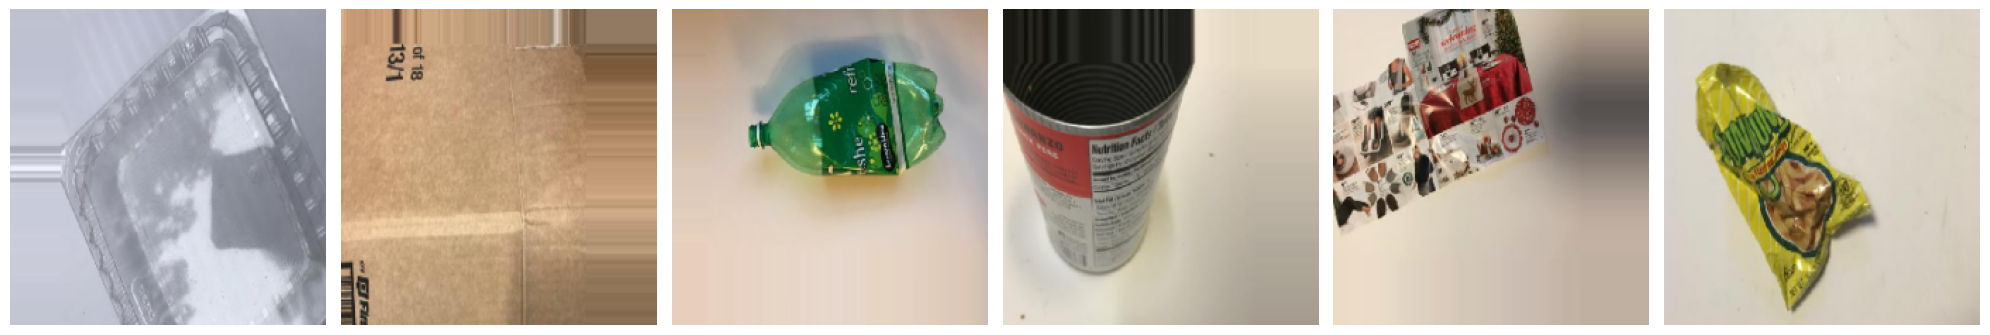

In [5]:
imgs, labels = next(train_batches)
plotImages(imgs)

# 4. Building CNN Architecture

In [6]:
# set the input image size for proposed CNN model
classifier.build_model()

# 5. Compile the Built CNN Model

In [7]:
classifier.compile()

# 6. Train the CNN model

In [8]:
# train the model with appropriate number of epochs
model_details = classifier.fit(epochs=20)


Epoch 1/20


/Users/marcossoto/Documents/test/mle-challenge/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 - 12s - 104ms/step - accuracy: 0.6880 - loss: 2.6432 - val_accuracy: 0.8647 - val_loss: 2.1098 - learning_rate: 5.0000e-04
Epoch 2/20
Epoch 2/20
111/111 - 9s - 84ms/step - accuracy: 0.8318 - loss: 2.1374 - val_accuracy: 0.8859 - val_loss: 1.9996 - learning_rate: 5.0000e-04
Epoch 3/20
111/111 - 9s - 84ms/step - accuracy: 0.8715 - loss: 1.9433 - val_accuracy: 0.8647 - val_loss: 1.9388 - learning_rate: 5.0000e-04
Epoch 4/20
111/111 - 9s - 85ms/step - accuracy: 0.8992 - loss: 1.8142 - val_accuracy: 0.8966 - val_loss: 1.7977 - learning_rate: 5.0000e-04
Epoch 5/20
111/111 - 10s - 87ms/step - accuracy: 0.9032 - loss: 1.7040 - val_accuracy: 0.8806 - val_loss: 1.7558 - learning_rate: 5.0000e-04
Epoch 6/20
111/111 - 10s - 91ms/step - accuracy: 0.9156 - loss: 1.5966 - val_accuracy: 0.8912 - val_loss: 1.6474 - learning_rate: 5.0000e-04
Epoch 7/20
111/111 - 10s - 91ms/step - accuracy: 0.9156 - loss: 1.5248 - val_accuracy: 0.8912 - val_loss: 1.6112 - learning_rate: 5.0000e-04
Epoch 8/20
111/

In [9]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [10]:
# store the accuracy of training
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

# 7. Fine Tune the CNN model

In [11]:
# unfreeze the convolution base of the base model inorder to fine-tune which adapt these pre-trained weights
# to work with the new dataset
classifier.base_model.trainable=True

In [12]:
# train and fine-tune the model with appropriate number of epochs
model_details = classifier.fit(epochs=10)

Epoch 1/10
111/111 - 11s - 101ms/step - accuracy: 0.9496 - loss: 0.8165 - val_accuracy: 0.9045 - val_loss: 1.0144 - learning_rate: 5.0000e-04
Epoch 2/10
111/111 - 12s - 106ms/step - accuracy: 0.9405 - loss: 0.8096 - val_accuracy: 0.8833 - val_loss: 1.0335 - learning_rate: 5.0000e-04
Epoch 3/10
111/111 - 11s - 103ms/step - accuracy: 0.9530 - loss: 0.7658 - val_accuracy: 0.8859 - val_loss: 1.0118 - learning_rate: 5.0000e-04
Epoch 4/10
111/111 - 11s - 103ms/step - accuracy: 0.9434 - loss: 0.7708 - val_accuracy: 0.8859 - val_loss: 0.9842 - learning_rate: 5.0000e-04
Epoch 5/10
111/111 - 12s - 106ms/step - accuracy: 0.9490 - loss: 0.7332 - val_accuracy: 0.9045 - val_loss: 0.9117 - learning_rate: 5.0000e-04
Epoch 6/10
111/111 - 12s - 105ms/step - accuracy: 0.9621 - loss: 0.6773 - val_accuracy: 0.8912 - val_loss: 0.8823 - learning_rate: 5.0000e-04
Epoch 7/10
111/111 - 11s - 103ms/step - accuracy: 0.9507 - loss: 0.6705 - val_accuracy: 0.8780 - val_loss: 0.9695 - learning_rate: 5.0000e-04
Epoch 

# 8. Visualization of Accuracy and Loss in Training and  Validation sets

In [13]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [14]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

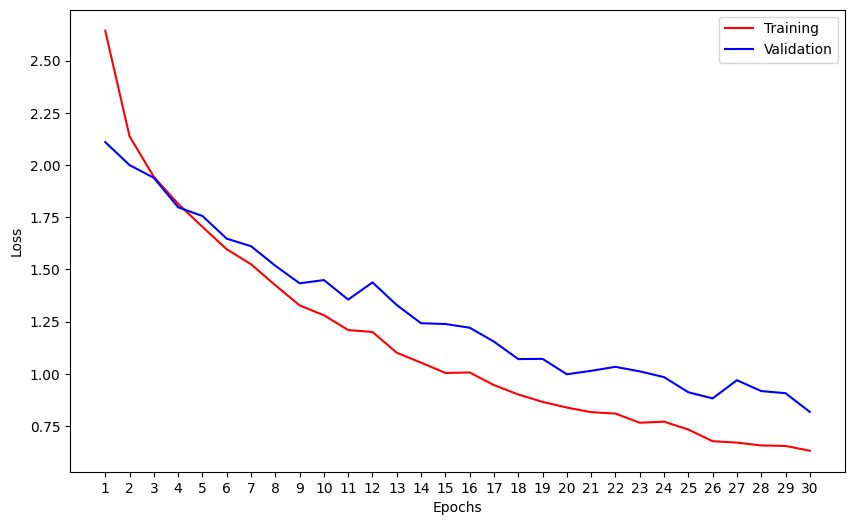

In [15]:
# plot the training and validation losses
plot_loss(loss, validation_loss)

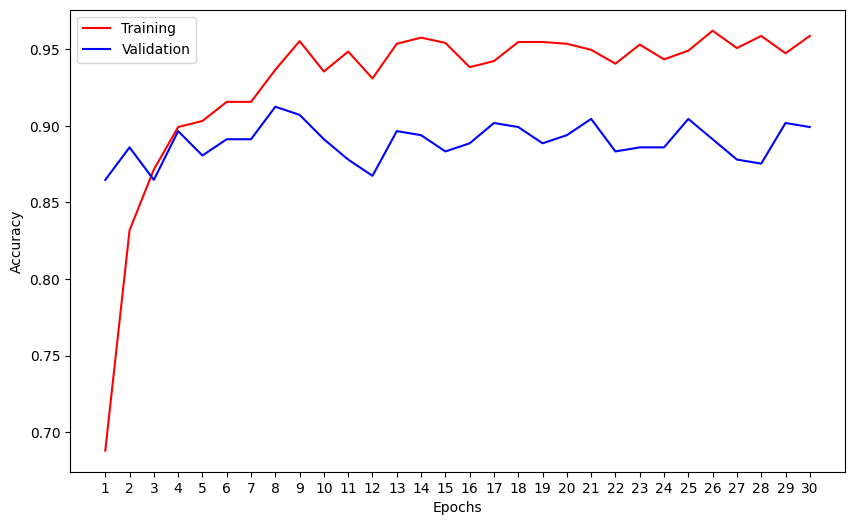

In [16]:
# plot the training and validation accuracy
plot_accuracy(accuracy, validation_accuracy)

# Finish tracker run

In [17]:
classifier.tracker.finish_run()

# Confusion matrix

In [18]:
Y_pred = classifier.predict(test_batches) #instead of valid_batches to get the test set predictions

/Users/marcossoto/Documents/test/mle-challenge/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


Classification Report
              precision    recall  f1-score   support

   cardboard       0.96      0.90      0.93        61
       glass       0.92      0.89      0.91        76
       metal       0.77      0.97      0.86        62
       paper       0.95      0.89      0.92        90
     plastic       0.91      0.82      0.86        73
       trash       0.80      0.91      0.85        22

    accuracy                           0.89       384
   macro avg       0.89      0.90      0.89       384
weighted avg       0.90      0.89      0.89       384



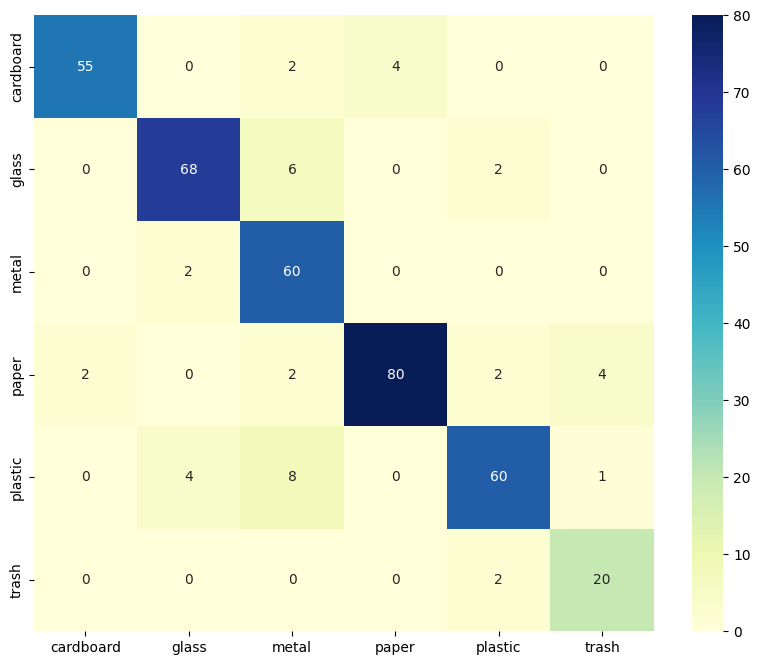

In [19]:
print_confusion_matrix(classifier.model, test_batches, Y_pred, CLASSES) #instead of valid_batches to get the test set predictions

## Print problematic cases

Got 20 worst predictions


<Figure size 640x480 with 0 Axes>

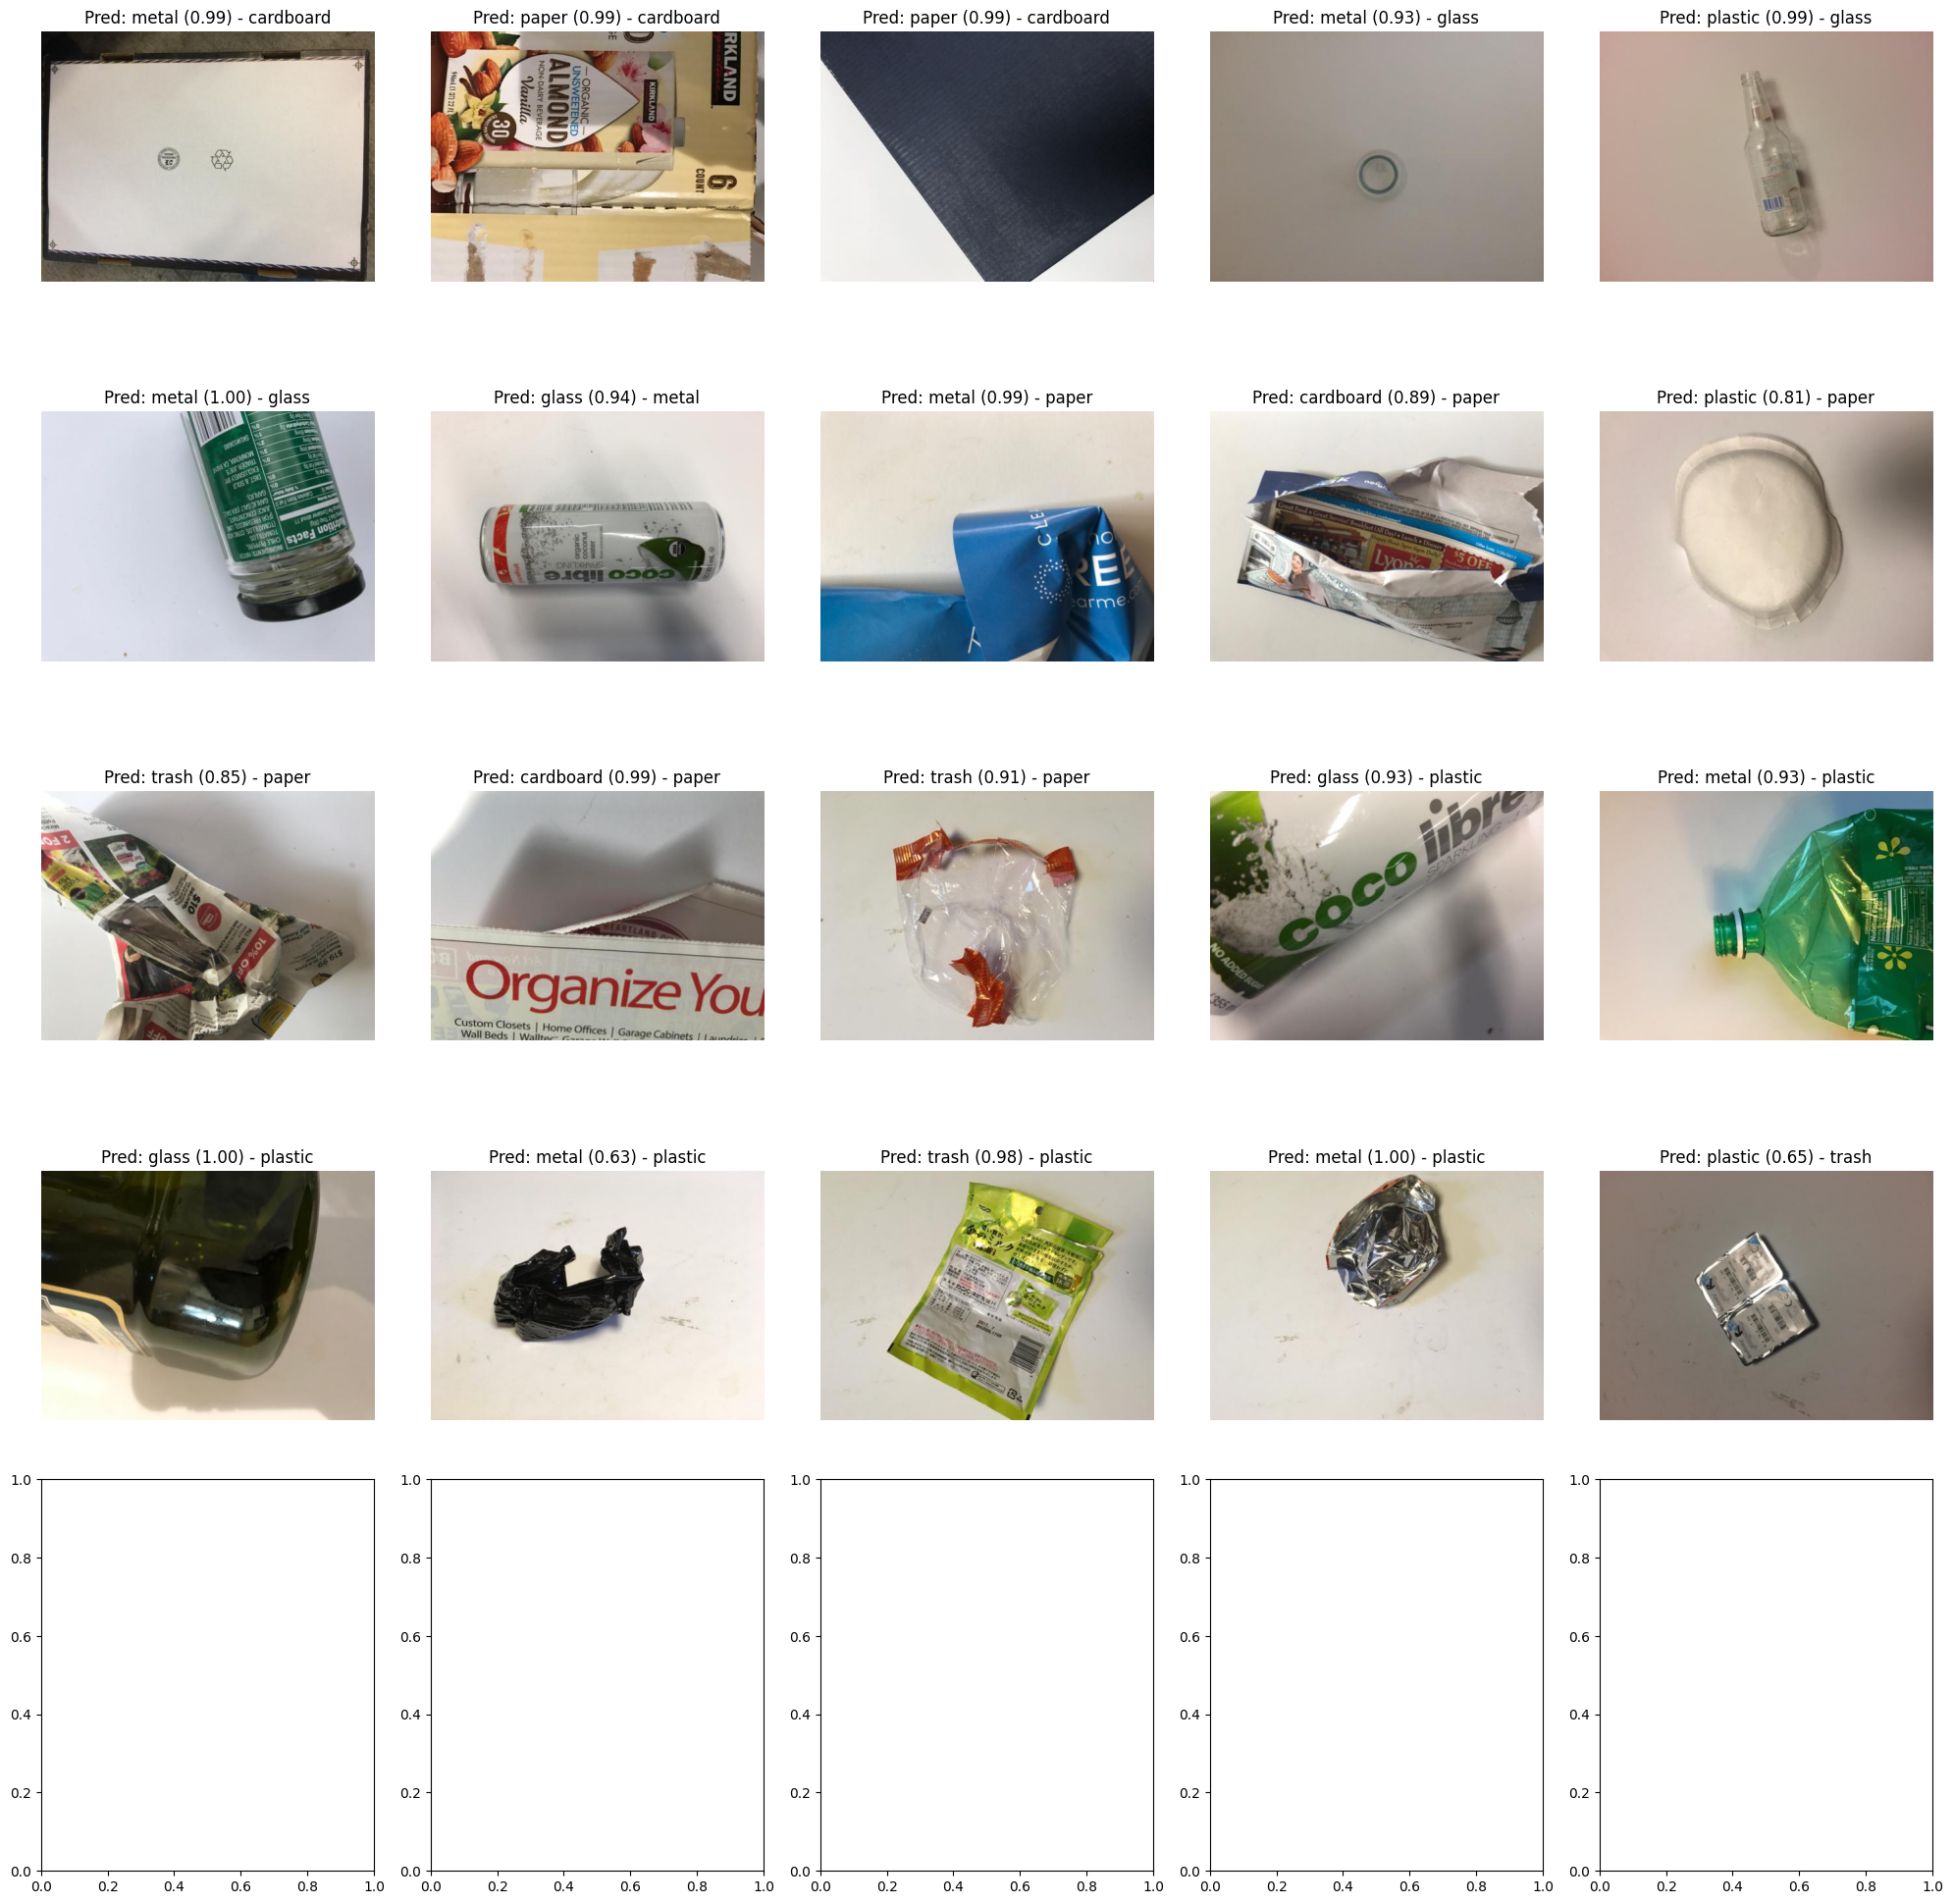

In [20]:
show_worst_preds(test_batches, Y_pred, CLASSES)  # instead of valid_batches to get the test set predictions